In [406]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from pandas_profiling import profile_report

In [407]:
df = pd.read_csv('train.csv')
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [408]:
df_test = pd.read_csv('test.csv')
df_test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [409]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [410]:
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


# Data Cleaning and Wrangling

In [411]:
#convert the target to categorical/object
df['Survived'] = df['Survived'].astype('object')

In [412]:
df.select_dtypes('int64').head()

,PassengerId,Pclass,SibSp,Parch
0,1,3,1,0
1,2,1,1,0
2,3,3,0,0
3,4,1,1,0
4,5,3,0,0


#### the Pclass, SibSp, Parch and Fare are categorical columns and should have dtype == object or category and not int64

In [413]:
df[['Pclass','SibSp','Parch']] = df.select_dtypes('int64').astype('object').drop(columns = ['PassengerId'],axis =1)

In [414]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    object 
 2   Pclass       891 non-null    object 
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    object 
 7   Parch        891 non-null    object 
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(1), object(9)
memory usage: 83.7+ KB


In [415]:
df.describe(include = 'float')

,Age,Fare
count,714.000000,891.000000
mean,29.699118,32.204208
std,14.526497,49.693429
min,0.420000,0.000000
25%,20.125000,7.910400
50%,28.000000,14.454200
75%,38.000000,31.000000
max,80.000000,512.329200


In [416]:
df.describe(include = 'object')

,Survived,Pclass,Name,Sex,SibSp,Parch,Ticket,Cabin,Embarked
count,891,891,891,891,891,891,891,204,889
unique,2,3,891,2,7,7,681,147,3
top,0,3,"Gaskell, Mr. Alfred",male,0,0,1601,C23 C25 C27,S
freq,549,491,1,577,608,678,7,4,644


In [417]:
df.query('Age < 1') #age values of infants

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
78,79,1,2,"Caldwell, Master. Alden Gates",male,0.83,0,2,248738,29.0000,NaN,S
305,306,1,1,"Allison, Master. Hudson Trevor",male,0.92,1,2,113781,151.5500,C22 C26,S
469,470,1,3,"Baclini, Miss. Helene Barbara",female,0.75,2,1,2666,19.2583,NaN,C
644,645,1,3,"Baclini, Miss. Eugenie",female,0.75,2,1,2666,19.2583,NaN,C
755,756,1,2,"Hamalainen, Master. Viljo",male,0.67,1,1,250649,14.5000,NaN,S
803,804,1,3,"Thomas, Master. Assad Alexander",male,0.42,0,1,2625,8.5167,NaN,C
831,832,1,2,"Richards, Master. George Sibley",male,0.83,1,1,29106,18.7500,NaN,S


## Handling Missing Values


#### lets check for missing values

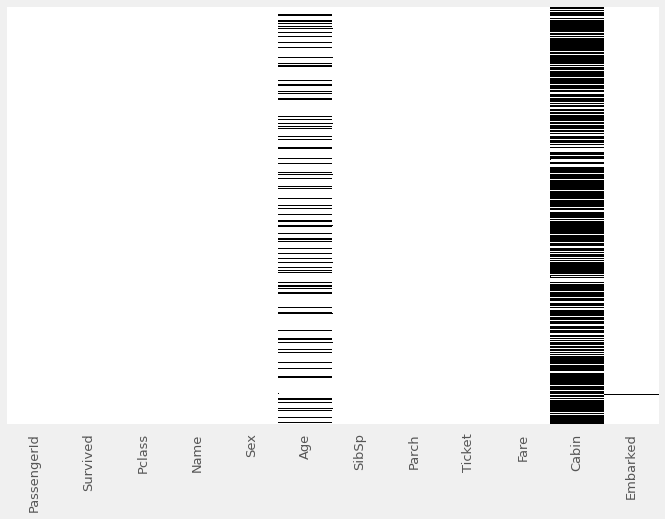

In [418]:
sns.heatmap(df.isna(),yticklabels=False,cmap=plt.cm.binary,cbar = False);

In [419]:
df.isna().sum()/df.shape[0] # percentage of missing values in each column

PassengerId    0.000000
Survived       0.000000
Pclass         0.000000
Name           0.000000
Sex            0.000000
Age            0.198653
SibSp          0.000000
Parch          0.000000
Ticket         0.000000
Fare           0.000000
Cabin          0.771044
Embarked       0.002245
dtype: float64

#### Cabin contains 77% of missing values while Age and Embarked contain 19.9% and 0.002244 of missing values  respectively

In [420]:
# Lets drop the Cabin column
df = df.drop(columns = ['Cabin'],axis = 1)

Age column's skew:  0.38910778230082704


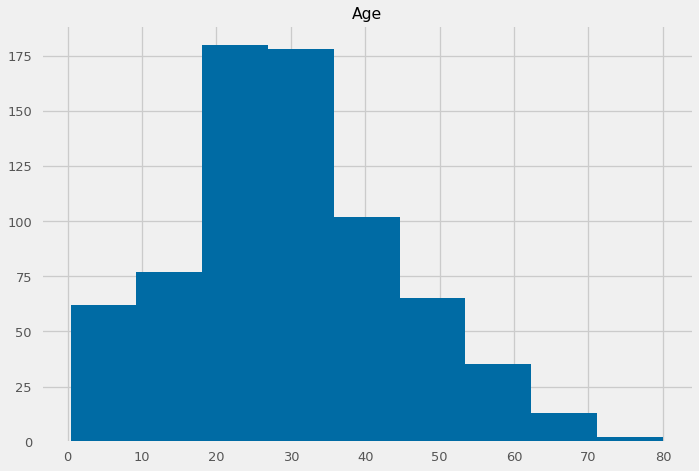

In [421]:
bins = np.linspace(df.Age.min(),df.Age.max(),10)
plt.hist(df['Age'],bins = bins)
plt.title('Age')
print('Age column\'s skew: ', df['Age'].skew())

In [422]:
missing_Age = df[df['Age'].isna()]
missing_Age.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,Q
17,18,1,2,"Williams, Mr. Charles Eugene",male,NaN,0,0,244373,13.0000,S
19,20,1,3,"Masselmani, Mrs. Fatima",female,NaN,0,0,2649,7.2250,C
26,27,0,3,"Emir, Mr. Farred Chehab",male,NaN,0,0,2631,7.2250,C
28,29,1,3,"O'Dwyer, Miss. Ellen ""Nellie""",female,NaN,0,0,330959,7.8792,Q


In [423]:
print(f'{df.Age.isna().sum()} missing Age entries')

177 missing Age entries


In [424]:
#get the index of missing Age values of passengers who ddnt survive
died = missing_Age[missing_Age['Survived']==0].index

#get the index of missing Age values of passengers who survived
survived = missing_Age[missing_Age['Survived']==1].index
print('number of survived passengers with missing Age entries: ',len(df.iloc[survived]))
print('number of dead passengers with missing Age entries: ',len(df.iloc[died]))

number of survived passengers with missing Age entries:  52
number of dead passengers with missing Age entries:  125


In [425]:
df.groupby(['Survived','Sex'])['Age'].mean()

Survived  Sex   
0         female    25.046875
          male      31.618056
1         female    28.847716
          male      27.276022
Name: Age, dtype: float64

### Imputation Steps
##### using the index of survived and died;

> get the index of males with missing age values who survived 

> Impute their missing Age values with the average age of males who survived >> >> assign imp1 as dataframe name

> get the index of females with missing age values who survived

> Impute their missing Age values with the average age of females who survived >> >> assign imp2 as dataframe name

> Repeat the above steps for males and females who ddnt survive as well. use imp3 and imp4 respectively as dataframe names

In [383]:
avg_age_of_males = np.ceil(df[df['Sex']=='male']['Age'].mean())
avg_age_of_females = np.ceil(df[df['Sex']=='female']['Age'].mean())
print(f'average age of females >>> {avg_age_of_females}')
print(f'average age of males >>> {avg_age_of_males}')

average age of females >>> 28.0
average age of males >>> 31.0


In [ ]:
males = df[df['Sex']=='male'].fillna(avg_age_of_males)
females = df[df['Sex']=='female'].fillna(avg_age_of_males)

df = pd.concat([males,females])
df.isna().sum()

In [32]:
# profile_report()

# Exploratory Data Analysis

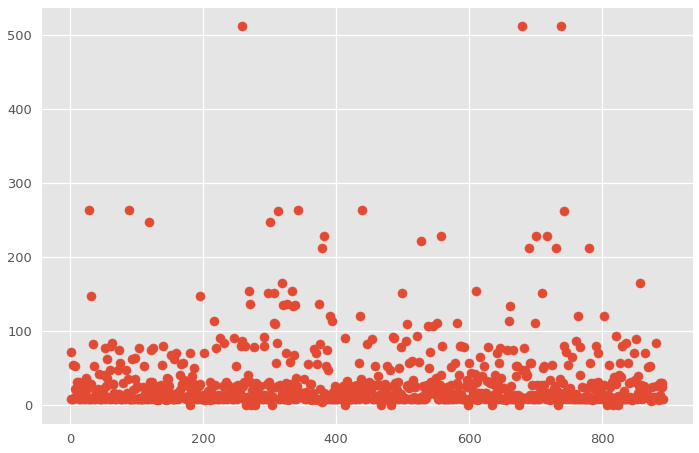

In [426]:
# lets check if the PassengerId is important
# is there a relationship between PassengerId and Fare ?

plt.style.use('ggplot')
plt.scatter(x = 'PassengerId',y = 'Fare',data = df); # PassengerId has no association with the passengers Fare

In [427]:
# by intuition we can say that ticket is awarded randomly and hence will not have any effect on the passenger's survival 
# hence its adviceable to drop or ignore the ticket

print('number of unique values in Ticket', df['Ticket'].nunique())
df =df.drop(columns = 'Ticket',axis = 1)
df.head()

number of unique values in Ticket 681


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,8.0500,S


In [428]:
categories = df.select_dtypes('object').drop(columns=['Survived','Name'])
categories.head()

,Pclass,Sex,SibSp,Parch,Embarked
0,3,male,1,0,S
1,1,female,1,0,C
2,3,female,0,0,S
3,1,female,1,0,S
4,3,male,0,0,S


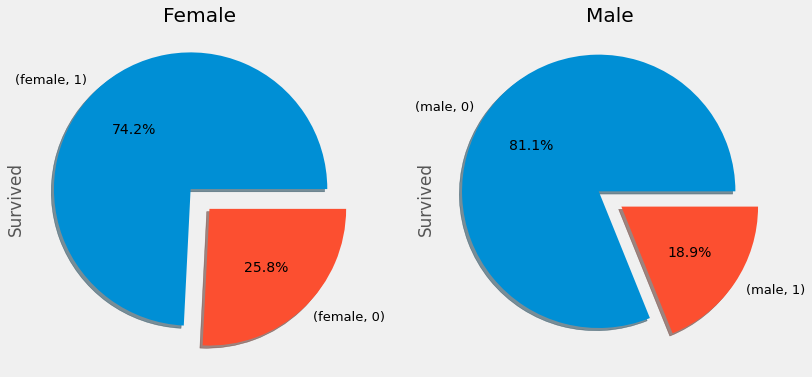

In [429]:
plt.style.use('fivethirtyeight')
#define plot axis
fig,axes = plt.subplots(nrows=1,ncols=2,figsize = (12,8))
    
df.groupby('Sex')['Survived'].value_counts()[0:2].plot(kind = 'pie',autopct='%1.1f%%',
                                                          shadow=True,ax = axes[0],explode =  [0.1,0.1]);
axes[0].set_title('Female')
df.groupby('Sex')['Survived'].value_counts()[2::].plot(kind = 'pie',autopct = '%1.1f%%',
                                                       shadow = True,ax = axes[1],explode = [0.1,0.1]);
axes[1].set_title('Male');

#### Female passengers Survived the Titanic than male passengers

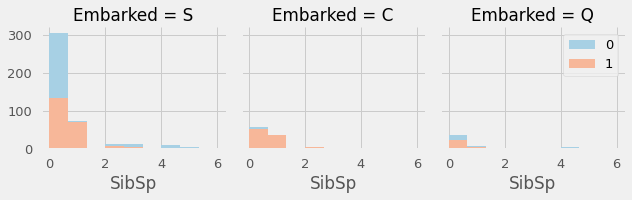

In [430]:
bins = np.linspace(df.Parch.min(),df.Parch.max(),10)
g = sns.FacetGrid(data = df,col ='Embarked',hue= 'Survived',palette='RdBu_r')
g.map(plt.hist,'SibSp',bins = bins)
plt.legend();

In [431]:
df.groupby('Parch')['Survived'].value_counts(normalize = True)

Parch  Survived
0      0           0.656342
       1           0.343658
1      1           0.550847
       0           0.449153
2      0           0.500000
       1           0.500000
3      1           0.600000
       0           0.400000
4      0           1.000000
5      0           0.800000
       1           0.200000
6      0           1.000000
Name: Survived, dtype: float64

In [432]:
df.groupby('SibSp')['Survived'].value_counts()

SibSp  Survived
0      0           398
       1           210
1      1           112
       0            97
2      0            15
       1            13
3      0            12
       1             4
4      0            15
       1             3
5      0             5
8      0             7
Name: Survived, dtype: int64

In [433]:
num_cols = df.select_dtypes(np.number).drop(columns=['PassengerId'],axis = 1)
num_cols.head()

,Age,Fare
0,22.0,7.2500
1,38.0,71.2833
2,26.0,7.9250
3,35.0,53.1000
4,35.0,8.0500


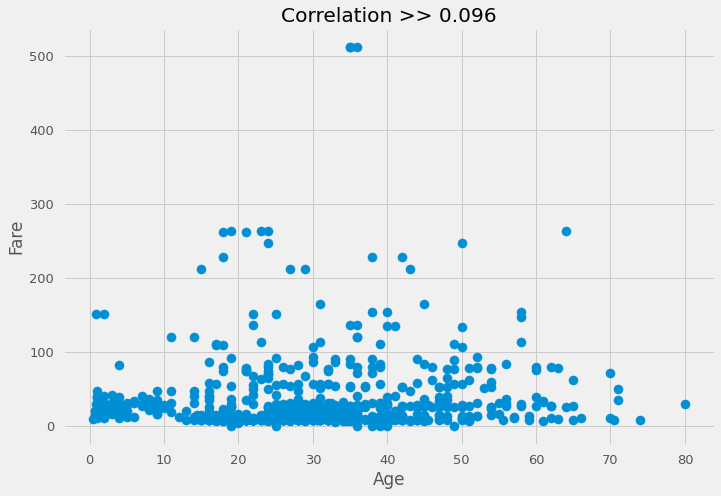

In [434]:
plt.scatter(num_cols['Age'],num_cols['Fare']);
plt.xlabel('Age');plt.ylabel('Fare')
plt.title(f'Correlation >> {num_cols.Age.corr(num_cols.Fare):.3f}')
plt.show()

#### There is no defined relationship between Age and Fare
#### A passenger's Age has nothing to do with the Fare he paid

In [438]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,8.0500,S


In [439]:
df = df.drop(columns = ['PassengerId','Name'],axis = 1)
df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22.0,1,0,7.2500,S
1,1,1,female,38.0,1,0,71.2833,C
2,1,3,female,26.0,0,0,7.9250,S
3,1,1,female,35.0,1,0,53.1000,S
4,0,3,male,35.0,0,0,8.0500,S


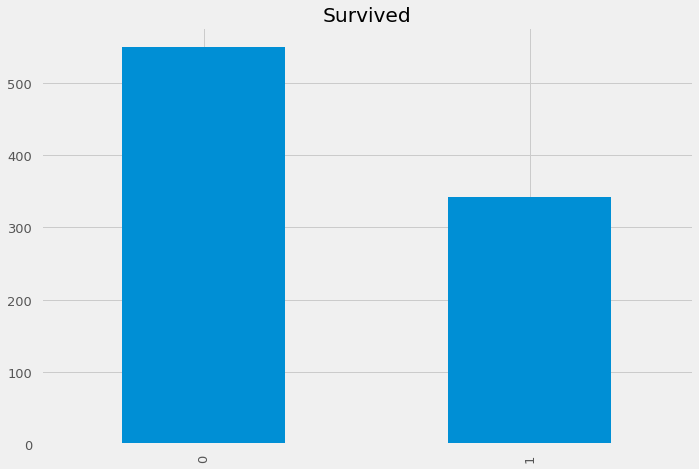

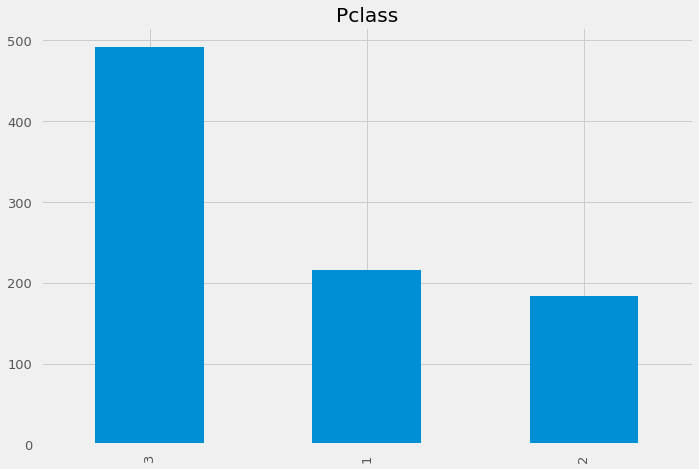

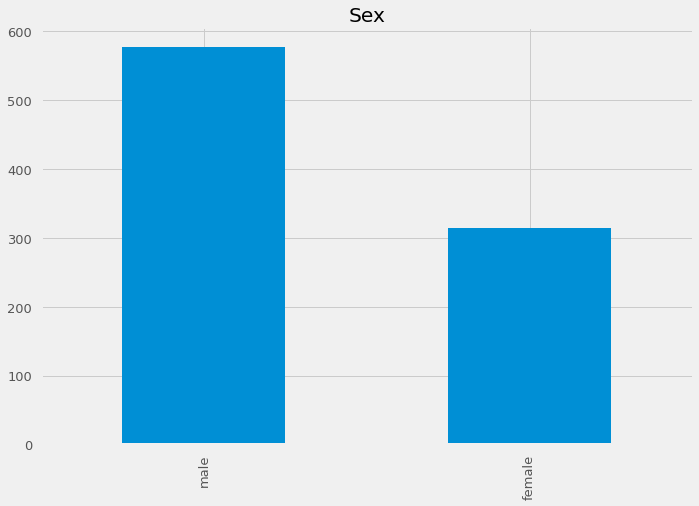

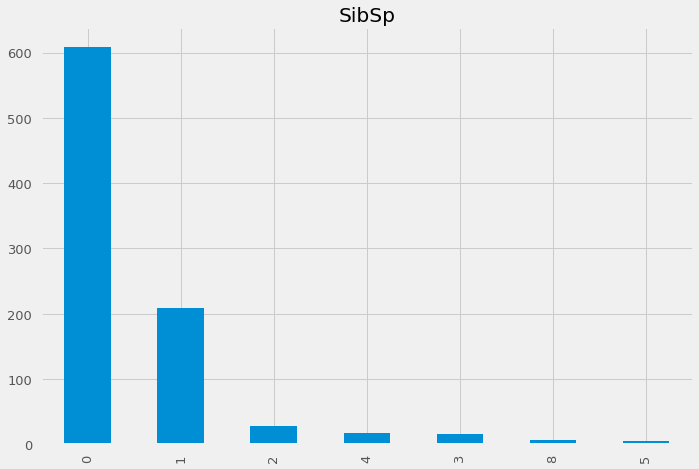

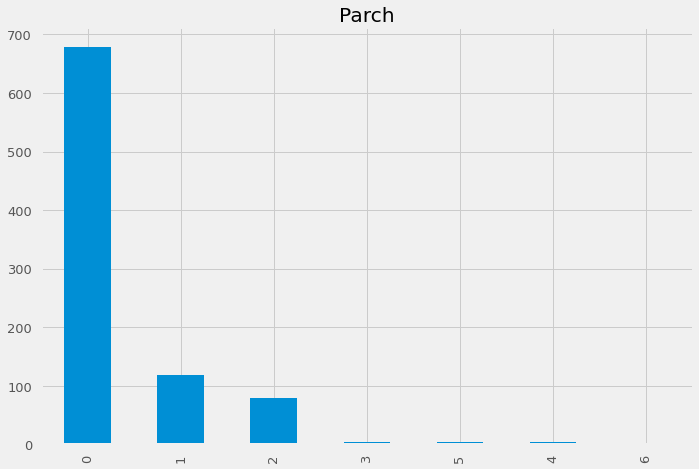

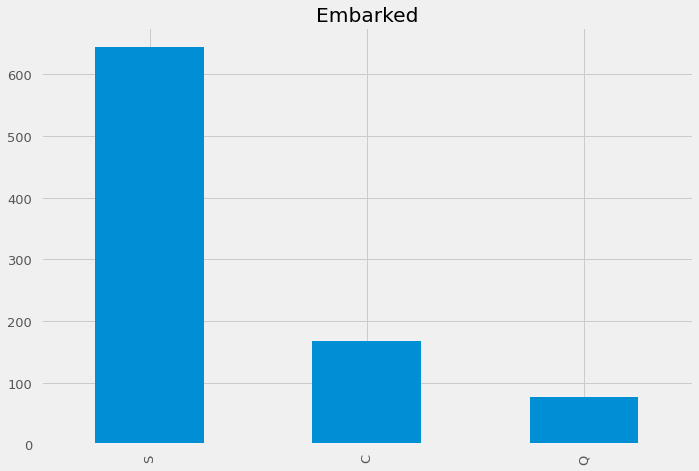

In [440]:
for i in df.select_dtypes('object'):
    df[i].value_counts().plot(kind ='bar')
    plt.title(i)
    plt.show()

####  greater number of passengers embarked from Southampton
#### Lots of males were onboard as compared to females
#### Majority of the passengers did not survive

Text(0.5, 1.0, 'Embarked vs Age')

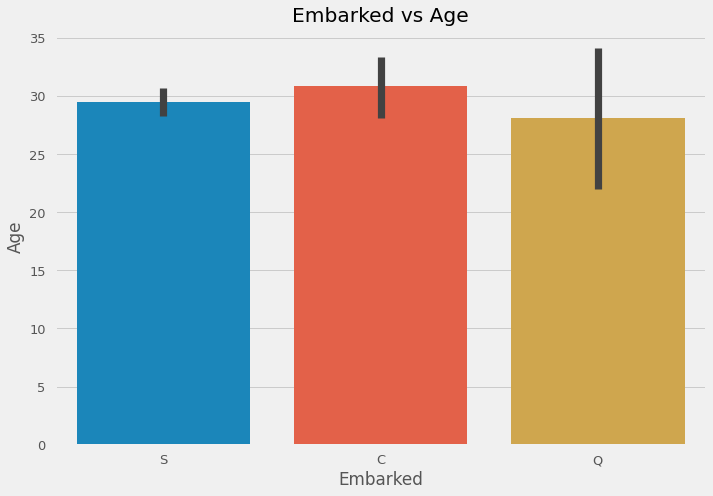

In [441]:
# Average Age of passengers with respect to the city they embarked from
sns.barplot(x = 'Embarked',y ='Age',data = df)
plt.title('Embarked vs Age')

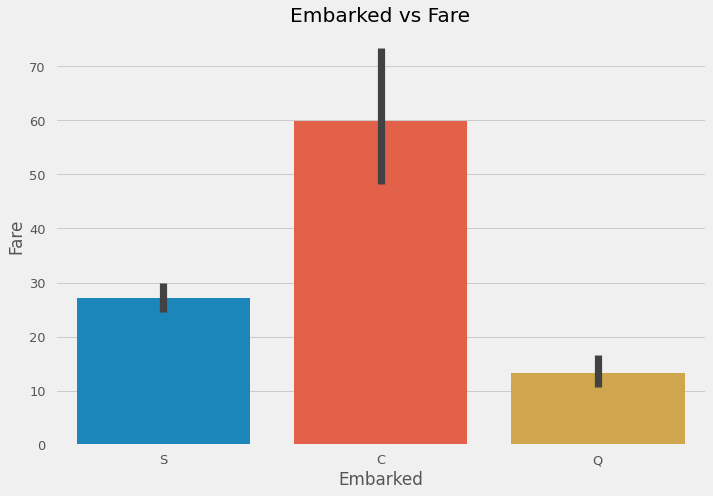

In [442]:
#Average Fare of passengers with grouped by Embarked
sns.barplot(x = 'Embarked',y ='Fare',data = df)
plt.title('Embarked vs Fare');

#### Passengers who embarked from C paid a much higher Fare on average
#### Let look at the number of people who survived and those that did not survive at C

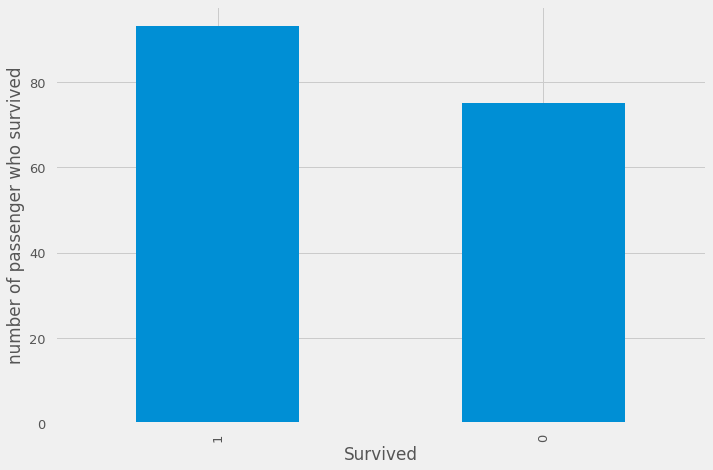

In [443]:
df[df['Embarked']=='C']['Survived'].value_counts().plot(kind = 'bar')
plt.xlabel('Survived')
plt.ylabel('number of passenger who survived');

Text(0.5, 1.0, 'S')

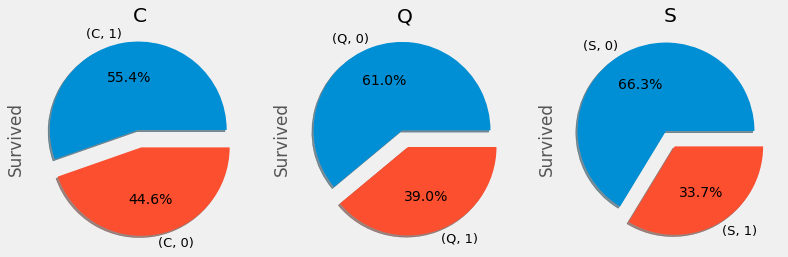

In [444]:
plt.style.use('fivethirtyeight')
fig,axes = plt.subplots(nrows=1,ncols=3,figsize = (12,8))
df.groupby('Embarked')['Survived'].value_counts(normalize = True)[0:2].plot(kind = 'pie',autopct = '%1.1f%%',
                                                                            explode = [0.1,0.1],shadow = True,ax =axes[0])

axes[0].set_title('C')
df.groupby('Embarked')['Survived'].value_counts(normalize = True)[2:4].plot(kind = 'pie',autopct = '%1.1f%%',
                                                                           explode = [0.1,0.1],shadow = True,ax =axes[1])
axes[1].set_title('Q')
df.groupby('Embarked')['Survived'].value_counts(normalize = True)[4::].plot(kind = 'pie',autopct = '%1.1f%%',
                                                                           explode = [0.1,0.1],shadow = True,ax =axes[2])
axes[2].set_title('S')

#### Most of the passengers who embarked from C survived
#### The chance/probability that a passenger from C will survive is 0.554 or 55.4%
#### Does that mean that the Rich were favoured ?

#### Lets use the 75th percentile of Fare paid to determine whether the rich passengers were favoured or not

In [445]:
expensive_fare = np.percentile(df['Fare'],75)
df[df['Fare']>=expensive_fare]['Embarked'].value_counts()

S    145
C     76
Q      2
Name: Embarked, dtype: int64

#### Even though passengers from C paid the highest Fare on average, the Majority of Passengers who paid high Fares were from Southampton
#### but this is only because lots of people embarked from southampton as compared to C and Q
#### hence comparing with ratio will be a lot more intuitive

In [446]:
#extract a given class from a feature
def deepdive(column,class_):
    return df[df[column]==class_]

#get the total number of people who embarked from each city
def count(column,class_):
    return(df[column]==class_).sum()

In [447]:
C = (deepdive('Embarked','C')['Fare']>=expensive_fare).sum()/count('Embarked','C')

print(f'{C*100:.3f}% of people who embarked from C paid at or above the 75th percentile')
      
"""this also means that 45% of passengers from C were among the richest people on the Titanic"""

45.238% of people who embarked from C paid at or above the 75th percentile


'this also means that 45% of passengers from C were among the richest people on the Titanic'

In [448]:
S = (deepdive('Embarked','S')['Fare']>=expensive_fare).sum()/count('Embarked','S')
print(f'{S*100:.3f}% of people who embarked from S paid at or above the 75th percentile')
      
"""only 22.5 % of passengers from S were among the richest people on the Titanic"""

22.516% of people who embarked from S paid at or above the 75th percentile


'only 22.5 % of passengers from S were among the richest people on the Titanic'

In [449]:
Q = (deepdive('Embarked','Q')['Fare']>=expensive_fare).sum()/count('Embarked','Q')
print(f'{Q*100:.3f}% of people who embarked from Q paid at or above the 75th percentile')
      
"""only 2.5 % of passengers from Q were among the richest people on the Titanic"""

2.597% of people who embarked from Q paid at or above the 75th percentile


'only 2.5 % of passengers from Q were among the richest people on the Titanic'

#### We are now convinced beyond reasonable doubts that C passengers were richer than the rest of the passengers from Q and S and C passengers survived more than the other embarked classes

#### From this insight, let use the Pclass to assert whether rich passengers were favoured

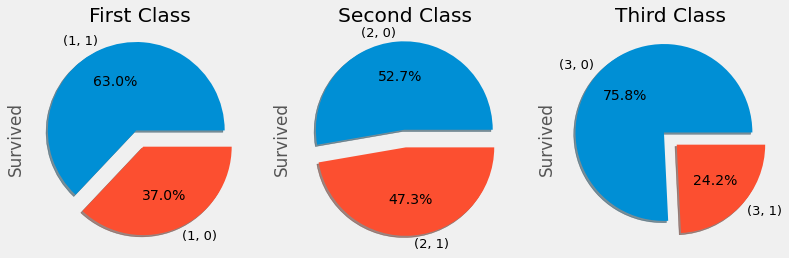

In [450]:
plt.style.use('fivethirtyeight')
fig,axes = plt.subplots(nrows=1,ncols=3,figsize = (12,8))
df.groupby('Pclass')['Survived'].value_counts(normalize = True)[0:2].plot(kind = 'pie',autopct = '%1.1f%%',
                                                                            explode = [0.1,0.1],shadow = True,ax =axes[0])
axes[0].set_title('First Class')

df.groupby('Pclass')['Survived'].value_counts(normalize = True)[2:4].plot(kind = 'pie',autopct = '%1.1f%%',
                                                                           explode = [0.1,0.1],shadow = True,ax =axes[1])
axes[1].set_title('Second Class')

df.groupby('Pclass')['Survived'].value_counts(normalize = True)[4::].plot(kind = 'pie',autopct = '%1.1f%%',
                                                                           explode = [0.1,0.1],shadow = True,ax =axes[2]);
axes[2].set_title('Third Class');

#### First class passengers were favored

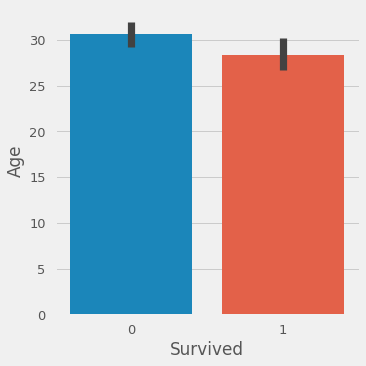

In [451]:
sns.catplot(kind = 'bar',data = df,x = 'Survived',y = 'Age');

In [452]:
### Looks like on Average, young people Survived the Titanic than older people

In [453]:
# on average, passengers who survived the titanic are younger than those who did not 
# lets explore more to find out whether children had a higher chance of surviving

In [454]:
surv = deepdive('Survived',1)

C:\Users\User\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


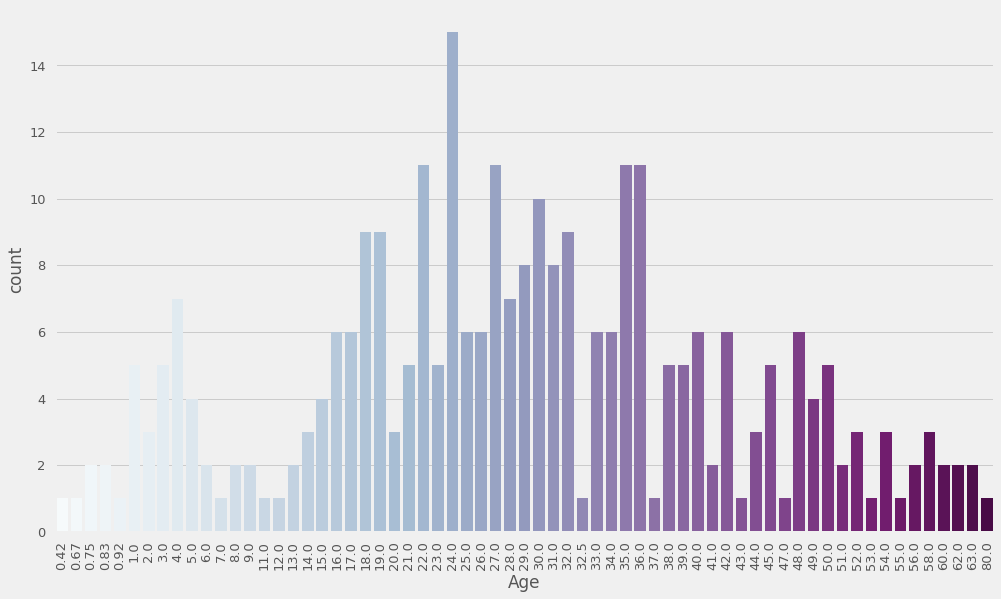

In [455]:
plt.rcParams['figure.figsize'] = (15, 9)
plt.style.use('tableau-colorblind10')

sns.countplot(surv['Age'], palette = 'BuPu')
plt.xticks(rotation =90);

Text(0.5, 1.0, 'Age distribution of Survived Passengers')

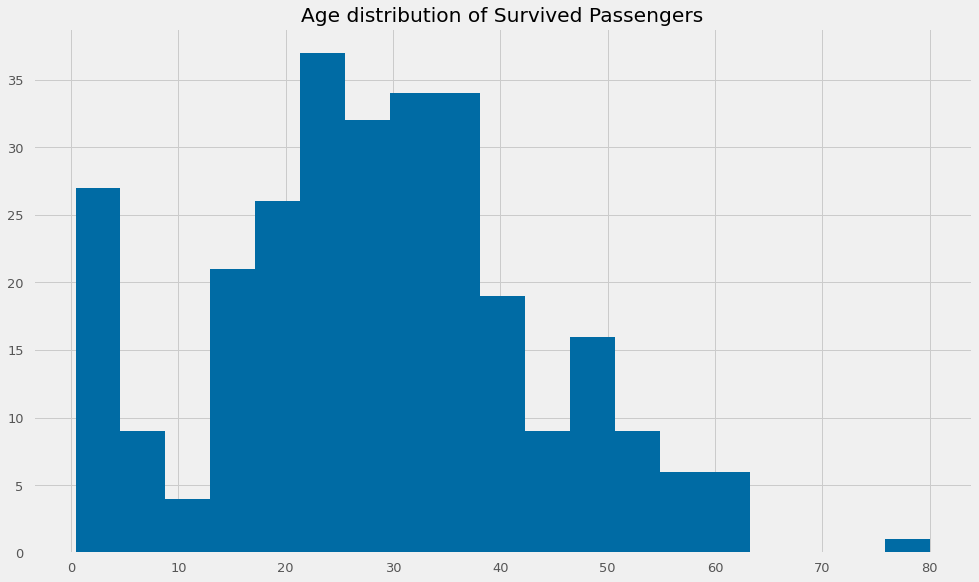

In [456]:
bins = np.linspace(surv['Age'].min(),surv['Age'].max(),20)
surv['Age'].hist(bins = bins)
plt.title('Age distribution of Survived Passengers')

### from the distribution, most of the survived passengers were middle aged, thus between 20 and 40

In [457]:
def investigate_age(percentile,criterion = 'less'):
    deepdive('Survived',1)
    age_percentile = np.percentile(df['Age'],percentile)
    print('{}th percentile is {} years'.format(percentile,age_percentile))
    if criterion  == 'less':
        return df[df['Age']<=age_percentile]['Survived'].value_counts(normalize = True)
    elif criterion == 'greater':
        return df[df['Age']>=age_percentile]['Survived'].value_counts(normalize = True)
    else:
        print('criterion should be either less or greater')

In [458]:
investigate_age(25) #passengers aged at or below the 25th percentile

25th percentile is nan years


Series([], Name: Survived, dtype: float64)

In [459]:
investigate_age(10)#passengers aged at or below the 10th percentile

10th percentile is nan years


Series([], Name: Survived, dtype: float64)

In [460]:
investigate_age(5) #passengers aged at or below the 5th percentile

5th percentile is nan years


Series([], Name: Survived, dtype: float64)

In [461]:
investigate_age(75,criterion='greater') #passengers aged at or above the 75th percentile

75th percentile is nan years


Series([], Name: Survived, dtype: float64)

##### even though children were favoured, its only when the child is less than  or  6 years, which is the 5 percentile
##### that we can strongly say that he/she will survive with 70% chance... hence we can conclude that kids had a higher survival chance

In [462]:
df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22.0,1,0,7.2500,S
1,1,1,female,38.0,1,0,71.2833,C
2,1,3,female,26.0,0,0,7.9250,S
3,1,1,female,35.0,1,0,53.1000,S
4,0,3,male,35.0,0,0,8.0500,S


## Preprocessing

In [463]:
from sklearn.model_selection import train_test_split
from sklearn.compose import make_column_selector,make_column_transformer,ColumnTransformer
from sklearn.preprocessing import StandardScaler,OneHotEncoder,MinMaxScaler,Normalizer,OrdinalEncoder,LabelEncoder
from sklearn.ensemble import AdaBoostClassifier,BaggingClassifier,VotingClassifier,StackingClassifier
from sklearn.pipeline import make_pipeline,Pipeline
from sklearn import set_config
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import KNNImputer,IterativeImputer
from sklearn.linear_model import LogisticRegression
from sklearn.compose import make_column_selector
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import confusion_matrix,precision_score,recall_score,jaccard_score,log_loss,classification_report
set_config(display='diagram')

In [464]:
X = df.iloc[:,df.columns!="Survived"]
y = df['Survived'].astype('int')
X.head()

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,3,male,22.0,1,0,7.2500,S
1,1,female,38.0,1,0,71.2833,C
2,3,female,26.0,0,0,7.9250,S
3,1,female,35.0,1,0,53.1000,S
4,3,male,35.0,0,0,8.0500,S


In [465]:
 X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=111,stratify=y)

In [466]:
print(f'percentage of training data >>> {X_train.shape[0]/len(X):.2f}%')
print(f'percentage of testing data >>> {len(X_test)/len(X):.2f}%')

percentage of training data >>> 0.80%
percentage of testing data >>> 0.20%


In [467]:
oe = OrdinalEncoder(categories=[[3,2,1],['male','female'],['S','Q','C']],handle_unknown='ignore')
ohe = OneHotEncoder(handle_unknown='ignore')
num_cols = make_column_selector(dtype_exclude='object')

In [468]:
def cm_plot(model):
    y_pred = model.predict(X_test)
    cm  = confusion_matrix(y_test,y_pred)
    print(classification_report(y_test,y_pred))
    plt.style.use('seaborn-talk')
    g = sns.heatmap(cm,annot=True)
    g.set_xticklabels(['Died','Survived'])
    g.set_yticklabels(['Died','Survived'])
    plt.show()

### Transformer ct_1 
    >>> Applies Ordinal Encoding on Pclass,Sex and Embarked
    >>> Applies One Hot Encoding on Pclass

### Transformer ct_2
    >>> Applies Ordinal Encoding on Pclass,Sex and Embarked
    >>> Applies Feature Scaling to numerical features ['Age' and 'Sex']
    >>> A passthrough is implemented for the remaining columns, thus ['Parch']
        recommended for non parametric models such as KNN and SVM
### Transformer ct_3
    >>> Implements an Ordinal Encoding on Pclass,Sex and Embarked
    >>> Applies One Hot Encoding to Parch
    >>> Scales Numerical Columns

### Note
    :: Feature scaling algorithm is mutable.
    :::: Other custom transformers will be tried out as well.
    :::::::: eg. Implementing Transfomer ct1 with no Encoding on Pclass or feature Scaling.
    ::::::::::::: recommended strategy for tree based models.

In [469]:
#Transformer_ct1
ct_1 = ColumnTransformer([('encoder_1',oe,['Pclass','Sex','Embarked']),
                            ('encoder_2',ohe,['Parch'])],remainder = 'passthrough')
#Transformer_ct2
ct_2 = ColumnTransformer([('encoder_1',oe,['Pclass','Sex','Embarked']),
                            ('scaler',StandardScaler(),['Age','Fare'])],remainder='passthrough')
#Transformer_ct3
ct_3 = ColumnTransformer([('encoder_1',oe,['Pclass','Sex','Embarked']),('encoder_2',ohe,['Parch']),
                            ('scaler',StandardScaler(),['Age','Fare'])],remainder='passthrough')

ct_4 =  ColumnTransformer([('encoder_1',oe,['Pclass','Sex','Embarked'])],remainder = 'passthrough')

# K NEAREST NEIGHBORS CLASSIFIER

In [470]:
from sklearn.neighbors import KNeighborsClassifier # import dependencies

# Build a KNN Classifier
knn = KNeighborsClassifier(n_neighbors = 3)

In [478]:
pipe = Pipeline([('transformer',ct_1),
                 ('scaler',MinMaxScaler()),("Imputer",KNNImputer()),('classifier',knn)])

pipe2 = Pipeline([('transformer',ct_4),("Imputer",KNNImputer()),('classifier',knn)])

In [479]:
model = Pipeline([('Model',pipe)])

In [480]:
pipe2.get_params().keys()

dict_keys(['memory', 'steps', 'verbose', 'transformer', 'Imputer', 'classifier', 'transformer__n_jobs', 'transformer__remainder', 'transformer__sparse_threshold', 'transformer__transformer_weights', 'transformer__transformers', 'transformer__verbose', 'transformer__encoder_1', 'transformer__encoder_1__categories', 'transformer__encoder_1__dtype', 'transformer__encoder_1__handle_unknown', 'transformer__encoder_1__unknown_value', 'Imputer__add_indicator', 'Imputer__copy', 'Imputer__metric', 'Imputer__missing_values', 'Imputer__n_neighbors', 'Imputer__weights', 'classifier__algorithm', 'classifier__leaf_size', 'classifier__metric', 'classifier__metric_params', 'classifier__n_jobs', 'classifier__n_neighbors', 'classifier__p', 'classifier__weights'])

In [481]:
odds = [x for x in range(20) if x%2 !=0]

In [486]:
params = [{'Model':[pipe2],
           'Model__transformer':[ct_1,ct_2,ct_3,ct_4],
           'Model__classifier__n_neighbors':odds},
          
          {'Model':[pipe2],
           'Model__transformer':[ct_2,ct_3],
          'Model__transformer__scaler':[StandardScaler(),MinMaxScaler(),Normalizer()]},
          
          {'Model':[pipe],
           'Model__transformer':[ct_1,ct_4],
           'Model__scaler':[StandardScaler(),Normalizer(),MinMaxScaler()],
           'Model__classifier__n_neighbors':odds}]

In [487]:
gscv = GridSearchCV(estimator=model,param_grid=params,cv = 5)
gscv.fit(X_train,y_train)

C:\Users\User\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:610: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\User\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 593, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\User\anaconda3\lib\site-packages\sklearn\pipeline.py", line 346, in fit
    self._final_estimator.fit(Xt, y, **fit_params_last_step)
  File "C:\Users\User\anaconda3\lib\site-packages\sklearn\pipeline.py", line 341, in fit
    Xt = self._fit(X, y, **fit_params_steps)
  File "C:\Users\User\anaconda3\lib\site-packages\sklearn\pipeline.py", line 303, in _fit
    X, fitted_transformer = fit_transform_one_cached(
  File "C:\Users\User\anaconda3\lib\site-packages\joblib\memory.py", line 352, in __call__
    return self.func(*args, **kwargs)
  File "C:\Users\User\a

C:\Users\User\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:610: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\User\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 593, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\User\anaconda3\lib\site-packages\sklearn\pipeline.py", line 346, in fit
    self._final_estimator.fit(Xt, y, **fit_params_last_step)
  File "C:\Users\User\anaconda3\lib\site-packages\sklearn\pipeline.py", line 341, in fit
    Xt = self._fit(X, y, **fit_params_steps)
  File "C:\Users\User\anaconda3\lib\site-packages\sklearn\pipeline.py", line 303, in _fit
    X, fitted_transformer = fit_transform_one_cached(
  File "C:\Users\User\anaconda3\lib\site-packages\joblib\memory.py", line 352, in __call__
    return self.func(*args, **kwargs)
  File "C:\Users\User\a

C:\Users\User\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:610: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\User\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 593, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\User\anaconda3\lib\site-packages\sklearn\pipeline.py", line 346, in fit
    self._final_estimator.fit(Xt, y, **fit_params_last_step)
  File "C:\Users\User\anaconda3\lib\site-packages\sklearn\pipeline.py", line 341, in fit
    Xt = self._fit(X, y, **fit_params_steps)
  File "C:\Users\User\anaconda3\lib\site-packages\sklearn\pipeline.py", line 303, in _fit
    X, fitted_transformer = fit_transform_one_cached(
  File "C:\Users\User\anaconda3\lib\site-packages\joblib\memory.py", line 352, in __call__
    return self.func(*args, **kwargs)
  File "C:\Users\User\a

C:\Users\User\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:610: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\User\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 593, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\User\anaconda3\lib\site-packages\sklearn\pipeline.py", line 346, in fit
    self._final_estimator.fit(Xt, y, **fit_params_last_step)
  File "C:\Users\User\anaconda3\lib\site-packages\sklearn\pipeline.py", line 341, in fit
    Xt = self._fit(X, y, **fit_params_steps)
  File "C:\Users\User\anaconda3\lib\site-packages\sklearn\pipeline.py", line 303, in _fit
    X, fitted_transformer = fit_transform_one_cached(
  File "C:\Users\User\anaconda3\lib\site-packages\joblib\memory.py", line 352, in __call__
    return self.func(*args, **kwargs)
  File "C:\Users\User\a

C:\Users\User\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:610: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\User\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 593, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\User\anaconda3\lib\site-packages\sklearn\pipeline.py", line 346, in fit
    self._final_estimator.fit(Xt, y, **fit_params_last_step)
  File "C:\Users\User\anaconda3\lib\site-packages\sklearn\pipeline.py", line 341, in fit
    Xt = self._fit(X, y, **fit_params_steps)
  File "C:\Users\User\anaconda3\lib\site-packages\sklearn\pipeline.py", line 303, in _fit
    X, fitted_transformer = fit_transform_one_cached(
  File "C:\Users\User\anaconda3\lib\site-packages\joblib\memory.py", line 352, in __call__
    return self.func(*args, **kwargs)
  File "C:\Users\User\a

C:\Users\User\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:610: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\User\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 593, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\User\anaconda3\lib\site-packages\sklearn\pipeline.py", line 346, in fit
    self._final_estimator.fit(Xt, y, **fit_params_last_step)
  File "C:\Users\User\anaconda3\lib\site-packages\sklearn\pipeline.py", line 341, in fit
    Xt = self._fit(X, y, **fit_params_steps)
  File "C:\Users\User\anaconda3\lib\site-packages\sklearn\pipeline.py", line 303, in _fit
    X, fitted_transformer = fit_transform_one_cached(
  File "C:\Users\User\anaconda3\lib\site-packages\joblib\memory.py", line 352, in __call__
    return self.func(*args, **kwargs)
  File "C:\Users\User\a

C:\Users\User\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:610: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\User\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 593, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\User\anaconda3\lib\site-packages\sklearn\pipeline.py", line 346, in fit
    self._final_estimator.fit(Xt, y, **fit_params_last_step)
  File "C:\Users\User\anaconda3\lib\site-packages\sklearn\pipeline.py", line 341, in fit
    Xt = self._fit(X, y, **fit_params_steps)
  File "C:\Users\User\anaconda3\lib\site-packages\sklearn\pipeline.py", line 303, in _fit
    X, fitted_transformer = fit_transform_one_cached(
  File "C:\Users\User\anaconda3\lib\site-packages\joblib\memory.py", line 352, in __call__
    return self.func(*args, **kwargs)
  File "C:\Users\User\a

C:\Users\User\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:610: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\User\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 593, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\User\anaconda3\lib\site-packages\sklearn\pipeline.py", line 346, in fit
    self._final_estimator.fit(Xt, y, **fit_params_last_step)
  File "C:\Users\User\anaconda3\lib\site-packages\sklearn\pipeline.py", line 341, in fit
    Xt = self._fit(X, y, **fit_params_steps)
  File "C:\Users\User\anaconda3\lib\site-packages\sklearn\pipeline.py", line 303, in _fit
    X, fitted_transformer = fit_transform_one_cached(
  File "C:\Users\User\anaconda3\lib\site-packages\joblib\memory.py", line 352, in __call__
    return self.func(*args, **kwargs)
  File "C:\Users\User\a

C:\Users\User\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:610: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\User\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 593, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\User\anaconda3\lib\site-packages\sklearn\pipeline.py", line 346, in fit
    self._final_estimator.fit(Xt, y, **fit_params_last_step)
  File "C:\Users\User\anaconda3\lib\site-packages\sklearn\pipeline.py", line 341, in fit
    Xt = self._fit(X, y, **fit_params_steps)
  File "C:\Users\User\anaconda3\lib\site-packages\sklearn\pipeline.py", line 303, in _fit
    X, fitted_transformer = fit_transform_one_cached(
  File "C:\Users\User\anaconda3\lib\site-packages\joblib\memory.py", line 352, in __call__
    return self.func(*args, **kwargs)
  File "C:\Users\User\a

C:\Users\User\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:610: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\User\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 593, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\User\anaconda3\lib\site-packages\sklearn\pipeline.py", line 346, in fit
    self._final_estimator.fit(Xt, y, **fit_params_last_step)
  File "C:\Users\User\anaconda3\lib\site-packages\sklearn\pipeline.py", line 341, in fit
    Xt = self._fit(X, y, **fit_params_steps)
  File "C:\Users\User\anaconda3\lib\site-packages\sklearn\pipeline.py", line 303, in _fit
    X, fitted_transformer = fit_transform_one_cached(
  File "C:\Users\User\anaconda3\lib\site-packages\joblib\memory.py", line 352, in __call__
    return self.func(*args, **kwargs)
  File "C:\Users\User\a

C:\Users\User\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:610: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\User\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 593, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\User\anaconda3\lib\site-packages\sklearn\pipeline.py", line 346, in fit
    self._final_estimator.fit(Xt, y, **fit_params_last_step)
  File "C:\Users\User\anaconda3\lib\site-packages\sklearn\pipeline.py", line 341, in fit
    Xt = self._fit(X, y, **fit_params_steps)
  File "C:\Users\User\anaconda3\lib\site-packages\sklearn\pipeline.py", line 303, in _fit
    X, fitted_transformer = fit_transform_one_cached(
  File "C:\Users\User\anaconda3\lib\site-packages\joblib\memory.py", line 352, in __call__
    return self.func(*args, **kwargs)
  File "C:\Users\User\a

C:\Users\User\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:610: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\User\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 593, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\User\anaconda3\lib\site-packages\sklearn\pipeline.py", line 346, in fit
    self._final_estimator.fit(Xt, y, **fit_params_last_step)
  File "C:\Users\User\anaconda3\lib\site-packages\sklearn\pipeline.py", line 341, in fit
    Xt = self._fit(X, y, **fit_params_steps)
  File "C:\Users\User\anaconda3\lib\site-packages\sklearn\pipeline.py", line 303, in _fit
    X, fitted_transformer = fit_transform_one_cached(
  File "C:\Users\User\anaconda3\lib\site-packages\joblib\memory.py", line 352, in __call__
    return self.func(*args, **kwargs)
  File "C:\Users\User\a

C:\Users\User\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:610: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\User\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 593, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\User\anaconda3\lib\site-packages\sklearn\pipeline.py", line 346, in fit
    self._final_estimator.fit(Xt, y, **fit_params_last_step)
  File "C:\Users\User\anaconda3\lib\site-packages\sklearn\pipeline.py", line 341, in fit
    Xt = self._fit(X, y, **fit_params_steps)
  File "C:\Users\User\anaconda3\lib\site-packages\sklearn\pipeline.py", line 303, in _fit
    X, fitted_transformer = fit_transform_one_cached(
  File "C:\Users\User\anaconda3\lib\site-packages\joblib\memory.py", line 352, in __call__
    return self.func(*args, **kwargs)
  File "C:\Users\User\a

C:\Users\User\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:610: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\User\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 593, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\User\anaconda3\lib\site-packages\sklearn\pipeline.py", line 346, in fit
    self._final_estimator.fit(Xt, y, **fit_params_last_step)
  File "C:\Users\User\anaconda3\lib\site-packages\sklearn\pipeline.py", line 341, in fit
    Xt = self._fit(X, y, **fit_params_steps)
  File "C:\Users\User\anaconda3\lib\site-packages\sklearn\pipeline.py", line 303, in _fit
    X, fitted_transformer = fit_transform_one_cached(
  File "C:\Users\User\anaconda3\lib\site-packages\joblib\memory.py", line 352, in __call__
    return self.func(*args, **kwargs)
  File "C:\Users\User\a

C:\Users\User\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:610: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\User\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 593, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\User\anaconda3\lib\site-packages\sklearn\pipeline.py", line 346, in fit
    self._final_estimator.fit(Xt, y, **fit_params_last_step)
  File "C:\Users\User\anaconda3\lib\site-packages\sklearn\pipeline.py", line 341, in fit
    Xt = self._fit(X, y, **fit_params_steps)
  File "C:\Users\User\anaconda3\lib\site-packages\sklearn\pipeline.py", line 303, in _fit
    X, fitted_transformer = fit_transform_one_cached(
  File "C:\Users\User\anaconda3\lib\site-packages\joblib\memory.py", line 352, in __call__
    return self.func(*args, **kwargs)
  File "C:\Users\User\a

C:\Users\User\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:610: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\User\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 593, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\User\anaconda3\lib\site-packages\sklearn\pipeline.py", line 346, in fit
    self._final_estimator.fit(Xt, y, **fit_params_last_step)
  File "C:\Users\User\anaconda3\lib\site-packages\sklearn\pipeline.py", line 341, in fit
    Xt = self._fit(X, y, **fit_params_steps)
  File "C:\Users\User\anaconda3\lib\site-packages\sklearn\pipeline.py", line 303, in _fit
    X, fitted_transformer = fit_transform_one_cached(
  File "C:\Users\User\anaconda3\lib\site-packages\joblib\memory.py", line 352, in __call__
    return self.func(*args, **kwargs)
  File "C:\Users\User\a

C:\Users\User\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:610: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\User\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 593, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\User\anaconda3\lib\site-packages\sklearn\pipeline.py", line 346, in fit
    self._final_estimator.fit(Xt, y, **fit_params_last_step)
  File "C:\Users\User\anaconda3\lib\site-packages\sklearn\pipeline.py", line 341, in fit
    Xt = self._fit(X, y, **fit_params_steps)
  File "C:\Users\User\anaconda3\lib\site-packages\sklearn\pipeline.py", line 303, in _fit
    X, fitted_transformer = fit_transform_one_cached(
  File "C:\Users\User\anaconda3\lib\site-packages\joblib\memory.py", line 352, in __call__
    return self.func(*args, **kwargs)
  File "C:\Users\User\a

C:\Users\User\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:610: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\User\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 593, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\User\anaconda3\lib\site-packages\sklearn\pipeline.py", line 346, in fit
    self._final_estimator.fit(Xt, y, **fit_params_last_step)
  File "C:\Users\User\anaconda3\lib\site-packages\sklearn\pipeline.py", line 341, in fit
    Xt = self._fit(X, y, **fit_params_steps)
  File "C:\Users\User\anaconda3\lib\site-packages\sklearn\pipeline.py", line 303, in _fit
    X, fitted_transformer = fit_transform_one_cached(
  File "C:\Users\User\anaconda3\lib\site-packages\joblib\memory.py", line 352, in __call__
    return self.func(*args, **kwargs)
  File "C:\Users\User\a

C:\Users\User\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:610: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\User\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 593, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\User\anaconda3\lib\site-packages\sklearn\pipeline.py", line 346, in fit
    self._final_estimator.fit(Xt, y, **fit_params_last_step)
  File "C:\Users\User\anaconda3\lib\site-packages\sklearn\pipeline.py", line 341, in fit
    Xt = self._fit(X, y, **fit_params_steps)
  File "C:\Users\User\anaconda3\lib\site-packages\sklearn\pipeline.py", line 303, in _fit
    X, fitted_transformer = fit_transform_one_cached(
  File "C:\Users\User\anaconda3\lib\site-packages\joblib\memory.py", line 352, in __call__
    return self.func(*args, **kwargs)
  File "C:\Users\User\a

C:\Users\User\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:610: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\User\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 593, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\User\anaconda3\lib\site-packages\sklearn\pipeline.py", line 346, in fit
    self._final_estimator.fit(Xt, y, **fit_params_last_step)
  File "C:\Users\User\anaconda3\lib\site-packages\sklearn\pipeline.py", line 341, in fit
    Xt = self._fit(X, y, **fit_params_steps)
  File "C:\Users\User\anaconda3\lib\site-packages\sklearn\pipeline.py", line 303, in _fit
    X, fitted_transformer = fit_transform_one_cached(
  File "C:\Users\User\anaconda3\lib\site-packages\joblib\memory.py", line 352, in __call__
    return self.func(*args, **kwargs)
  File "C:\Users\User\a

C:\Users\User\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:610: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\User\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 593, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\User\anaconda3\lib\site-packages\sklearn\pipeline.py", line 346, in fit
    self._final_estimator.fit(Xt, y, **fit_params_last_step)
  File "C:\Users\User\anaconda3\lib\site-packages\sklearn\pipeline.py", line 341, in fit
    Xt = self._fit(X, y, **fit_params_steps)
  File "C:\Users\User\anaconda3\lib\site-packages\sklearn\pipeline.py", line 303, in _fit
    X, fitted_transformer = fit_transform_one_cached(
  File "C:\Users\User\anaconda3\lib\site-packages\joblib\memory.py", line 352, in __call__
    return self.func(*args, **kwargs)
  File "C:\Users\User\a

C:\Users\User\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:610: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\User\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 593, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\User\anaconda3\lib\site-packages\sklearn\pipeline.py", line 346, in fit
    self._final_estimator.fit(Xt, y, **fit_params_last_step)
  File "C:\Users\User\anaconda3\lib\site-packages\sklearn\pipeline.py", line 341, in fit
    Xt = self._fit(X, y, **fit_params_steps)
  File "C:\Users\User\anaconda3\lib\site-packages\sklearn\pipeline.py", line 303, in _fit
    X, fitted_transformer = fit_transform_one_cached(
  File "C:\Users\User\anaconda3\lib\site-packages\joblib\memory.py", line 352, in __call__
    return self.func(*args, **kwargs)
  File "C:\Users\User\a

C:\Users\User\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:610: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\User\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 593, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\User\anaconda3\lib\site-packages\sklearn\pipeline.py", line 346, in fit
    self._final_estimator.fit(Xt, y, **fit_params_last_step)
  File "C:\Users\User\anaconda3\lib\site-packages\sklearn\pipeline.py", line 341, in fit
    Xt = self._fit(X, y, **fit_params_steps)
  File "C:\Users\User\anaconda3\lib\site-packages\sklearn\pipeline.py", line 303, in _fit
    X, fitted_transformer = fit_transform_one_cached(
  File "C:\Users\User\anaconda3\lib\site-packages\joblib\memory.py", line 352, in __call__
    return self.func(*args, **kwargs)
  File "C:\Users\User\a

C:\Users\User\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:610: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\User\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 593, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\User\anaconda3\lib\site-packages\sklearn\pipeline.py", line 346, in fit
    self._final_estimator.fit(Xt, y, **fit_params_last_step)
  File "C:\Users\User\anaconda3\lib\site-packages\sklearn\pipeline.py", line 341, in fit
    Xt = self._fit(X, y, **fit_params_steps)
  File "C:\Users\User\anaconda3\lib\site-packages\sklearn\pipeline.py", line 303, in _fit
    X, fitted_transformer = fit_transform_one_cached(
  File "C:\Users\User\anaconda3\lib\site-packages\joblib\memory.py", line 352, in __call__
    return self.func(*args, **kwargs)
  File "C:\Users\User\a

C:\Users\User\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:610: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\User\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 593, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\User\anaconda3\lib\site-packages\sklearn\pipeline.py", line 346, in fit
    self._final_estimator.fit(Xt, y, **fit_params_last_step)
  File "C:\Users\User\anaconda3\lib\site-packages\sklearn\pipeline.py", line 341, in fit
    Xt = self._fit(X, y, **fit_params_steps)
  File "C:\Users\User\anaconda3\lib\site-packages\sklearn\pipeline.py", line 303, in _fit
    X, fitted_transformer = fit_transform_one_cached(
  File "C:\Users\User\anaconda3\lib\site-packages\joblib\memory.py", line 352, in __call__
    return self.func(*args, **kwargs)
  File "C:\Users\User\a

C:\Users\User\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:610: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\User\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 593, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\User\anaconda3\lib\site-packages\sklearn\pipeline.py", line 346, in fit
    self._final_estimator.fit(Xt, y, **fit_params_last_step)
  File "C:\Users\User\anaconda3\lib\site-packages\sklearn\pipeline.py", line 341, in fit
    Xt = self._fit(X, y, **fit_params_steps)
  File "C:\Users\User\anaconda3\lib\site-packages\sklearn\pipeline.py", line 303, in _fit
    X, fitted_transformer = fit_transform_one_cached(
  File "C:\Users\User\anaconda3\lib\site-packages\joblib\memory.py", line 352, in __call__
    return self.func(*args, **kwargs)
  File "C:\Users\User\a

C:\Users\User\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:610: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\User\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 593, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\User\anaconda3\lib\site-packages\sklearn\pipeline.py", line 346, in fit
    self._final_estimator.fit(Xt, y, **fit_params_last_step)
  File "C:\Users\User\anaconda3\lib\site-packages\sklearn\pipeline.py", line 341, in fit
    Xt = self._fit(X, y, **fit_params_steps)
  File "C:\Users\User\anaconda3\lib\site-packages\sklearn\pipeline.py", line 303, in _fit
    X, fitted_transformer = fit_transform_one_cached(
  File "C:\Users\User\anaconda3\lib\site-packages\joblib\memory.py", line 352, in __call__
    return self.func(*args, **kwargs)
  File "C:\Users\User\a

C:\Users\User\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:610: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\User\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 593, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\User\anaconda3\lib\site-packages\sklearn\pipeline.py", line 346, in fit
    self._final_estimator.fit(Xt, y, **fit_params_last_step)
  File "C:\Users\User\anaconda3\lib\site-packages\sklearn\pipeline.py", line 341, in fit
    Xt = self._fit(X, y, **fit_params_steps)
  File "C:\Users\User\anaconda3\lib\site-packages\sklearn\pipeline.py", line 303, in _fit
    X, fitted_transformer = fit_transform_one_cached(
  File "C:\Users\User\anaconda3\lib\site-packages\joblib\memory.py", line 352, in __call__
    return self.func(*args, **kwargs)
  File "C:\Users\User\a

C:\Users\User\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:610: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\User\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 593, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\User\anaconda3\lib\site-packages\sklearn\pipeline.py", line 346, in fit
    self._final_estimator.fit(Xt, y, **fit_params_last_step)
  File "C:\Users\User\anaconda3\lib\site-packages\sklearn\pipeline.py", line 341, in fit
    Xt = self._fit(X, y, **fit_params_steps)
  File "C:\Users\User\anaconda3\lib\site-packages\sklearn\pipeline.py", line 303, in _fit
    X, fitted_transformer = fit_transform_one_cached(
  File "C:\Users\User\anaconda3\lib\site-packages\joblib\memory.py", line 352, in __call__
    return self.func(*args, **kwargs)
  File "C:\Users\User\a

ValueError: Input contains NaN

In [ ]:
gscv.best_estimator_

In [405]:
gscv.score(X_test,y_test)

0.8033707865168539

In [84]:
#Final Knn Model
knn_model = make_pipeline(ct_4,MinMaxScaler(),knn)
knn_model.fit(X_train,y_train)

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('encoder_1',
                                                  OrdinalEncoder(categories=[[3,
                                                                              2,
                                                                              1],
                                                                             ['male',
                                                                              'female'],
                                                                             ['S',
                                                                              'Q',
                                                                              'C']],
                                                                 handle_unknown='ignore'),
                                                  ['Pclass', 'Sex',
                                                   'Embarked'])])),
                ('minmaxscaler', MinMaxScaler()),
                ('kneighborsclassifier', KNeighborsClassifier(n_neighbors=3))])

In [85]:
knn_model.score(X_test,y_test)

0.8033707865168539

              precision    recall  f1-score   support

           0       0.86      0.82      0.84       110
           1       0.73      0.78      0.75        68

    accuracy                           0.80       178
   macro avg       0.79      0.80      0.79       178
weighted avg       0.81      0.80      0.80       178



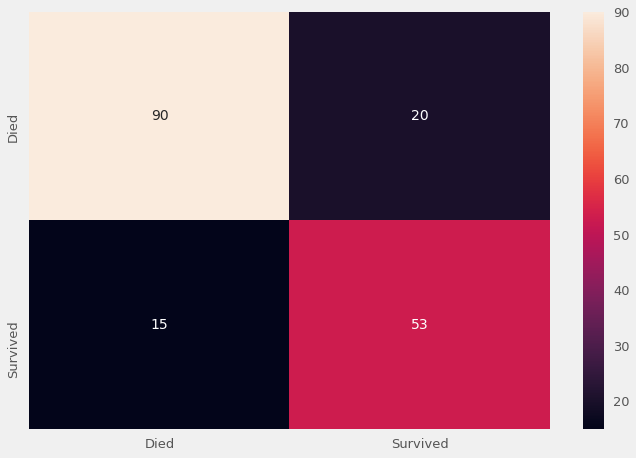

In [86]:
cm_plot(knn_model)

# Tree Models

In [94]:
from sklearn.ensemble import AdaBoostClassifier,RandomForestClassifier,VotingClassifier
from sklearn.tree import DecisionTreeClassifier

In [320]:
#define new column transformer for the tree based models
tree_ct = ColumnTransformer([("encoder",OrdinalEncoder(categories = [['male','female'],[3,2,1],['S','Q','C']]),
                              ['Sex','Pclass','Embarked'])], remainder='passthrough')
tree_ct

ColumnTransformer(remainder='passthrough',
                  transformers=[('encoder',
                                 OrdinalEncoder(categories=[['male', 'female'],
                                                            [3, 2, 1],
                                                            ['S', 'Q', 'C']]),
                                 ['Sex', 'Pclass', 'Embarked'])])

### ADAPTIVE BOOSTING - ADABOOST

In [491]:
dt = DecisionTreeClassifier(max_depth = None)


Adaboost = AdaBoostClassifier(base_estimator= dt,n_estimators=300,learning_rate=1,random_state=111)
Adaboost = make_pipeline((tree_ct),(KNNImputer()),(Adaboost))
Adaboost.fit(X_train,y_train)

ValueError: Input contains NaN

In [323]:
print('training score >>> :: ',Adaboost.score(X_train,y_train))
print('testing score >>> :: ',Adaboost.score(X_test,y_test))

training score >>> ::  0.9901547116736991
testing score >>> ::  0.8089887640449438


              precision    recall  f1-score   support

           0       0.84      0.85      0.85       110
           1       0.76      0.74      0.75        68

    accuracy                           0.81       178
   macro avg       0.80      0.79      0.80       178
weighted avg       0.81      0.81      0.81       178



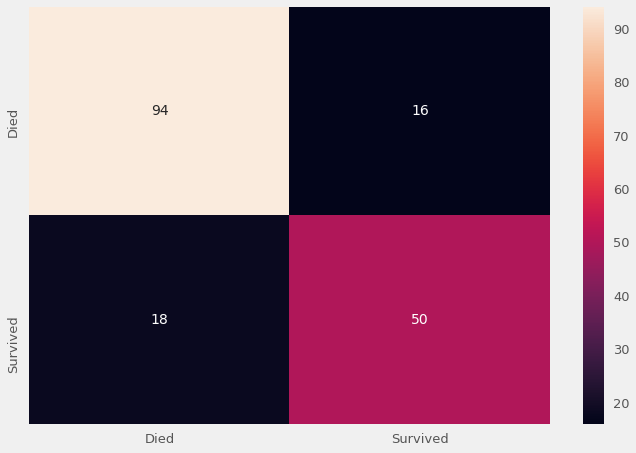

In [324]:
#model summary and confustion matrix 
cm_plot(Adaboost)

### RANDOM FOREST

In [345]:
Rf = RandomForestClassifier(n_estimators=100,criterion='entropy',random_state=100)
Rf = make_pipeline(tree_ct,Rf)

In [326]:
Rf.fit(X_train,y_train)

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('encoder',
                                                  OrdinalEncoder(categories=[['male',
                                                                              'female'],
                                                                             [3,
                                                                              2,
                                                                              1],
                                                                             ['S',
                                                                              'Q',
                                                                              'C']]),
                                                  ['Sex', 'Pclass',
                                                   'Embarked'])])),
                ('randomforestclassifier',
                 RandomForestClassifier(criterion='entropy',
                                        random_state=100))])

In [327]:
Rf.score(X_train,y_train)

0.9901547116736991

In [328]:
#score the Random Forest Model
Rf.score(X_test,y_test)

0.8089887640449438

              precision    recall  f1-score   support

           0       0.85      0.84      0.84       110
           1       0.74      0.76      0.75        68

    accuracy                           0.81       178
   macro avg       0.80      0.80      0.80       178
weighted avg       0.81      0.81      0.81       178



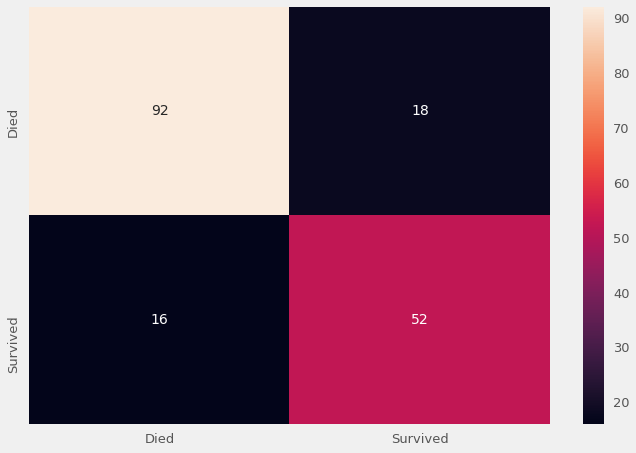

In [329]:
#plot confusion matrix for Random Forest Model
cm_plot(Rf) 

### XGBOOST

In [330]:
from xgboost import XGBClassifier

In [332]:
xgb = XGBClassifier(n_estimators = 500,
              use_label_encoder=False,
              learning_rate = 0.0045,
              random_state = 111,eval_metric = 'error')

xgb = make_pipeline(tree_ct,xgb)
xgb.fit(X_train,y_train)


Pipeline(steps=[('columntransformer',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('encoder',
                                                  OrdinalEncoder(categories=[['male',
                                                                              'female'],
                                                                             [3,
                                                                              2,
                                                                              1],
                                                                             ['S',
                                                                              'Q',
                                                                              'C']]),
                                                  ['Sex', 'Pclass',
                                                   'Embarked'])])),
                ('xgbclassifier',
                 XGBClassifier(base_score=0.5, booster='gbtree',
                               colsample_bylevel=1, colsample_bynode=1,
                               colsample_bytree=1, eval_metric='error', gamm...
                               gpu_id=-1, importance_type='gain',
                               interaction_constraints='', learning_rate=0.0045,
                               max_delta_step=0, max_depth=6,
                               min_child_weight=1, missing=nan,
                               monotone_constraints='()', n_estimators=500,
                               n_jobs=4, num_parallel_tree=1, random_state=111,
                               reg_alpha=0, reg_lambda=1, scale_pos_weight=1,
                               subsample=1, tree_method='exact',
                               use_label_encoder=False, validate_parameters=1,
                               verbosity=None))])

In [333]:
xgb.score(X_train,y_train)

0.909985935302391

In [334]:
xgb.score(X_test,y_test)

0.8764044943820225

In [ ]:
#model summary and confustion matrix 



### LOGISTIC REGRESSION

In [339]:
logreg = LogisticRegression(C=0.6,max_iter=800)
logreg = make_pipeline(ct_4,logreg)
logreg.fit(X_train,y_train)

In [336]:
print("training score",logreg.score(X_train,y_train))
print("testing score",logreg.score(X_test,y_test))

training score 0.8087201125175809
testing score 0.7865168539325843


In [ ]:
#model summary and confustion matrix 



### NAIVE BAYES

In [342]:
from sklearn.naive_bayes import GaussianNB
nb = GaussianNB()
nb = make_pipeline(tree_ct,nb)
nb.fit(X_train,y_train)

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('encoder',
                                                  OrdinalEncoder(categories=[['male',
                                                                              'female'],
                                                                             [3,
                                                                              2,
                                                                              1],
                                                                             ['S',
                                                                              'Q',
                                                                              'C']]),
                                                  ['Sex', 'Pclass',
                                                   'Embarked'])])),
                ('gaussiannb', GaussianNB())])

In [343]:
print("training score",nb.score(X_train,y_train))
print("testing score",nb.score(X_test,y_test))

training score 0.7918424753867792
testing score 0.7752808988764045


In [ ]:
#model summary and confustion matrix 



### VOTING ENSEMBLE

In [337]:
vote = VotingClassifier(estimators=[('KNN',knn_model),
                                    ("xgboost",xgb),
                                    ('RandomForest',Rf),
                                    ("Logistic Regression",logreg),
                                    ('Adaboost',Adaboost)],voting='soft')

In [338]:
vote.fit(X_train,y_train)
print('training score :::', vote.score(X_train,y_train))
print('testing score :::',vote.score(X_test,y_test))

training score ::: 0.960618846694796
testing score ::: 0.8426966292134831


              precision    recall  f1-score   support

           0       0.87      0.87      0.87       110
           1       0.79      0.79      0.79        68

    accuracy                           0.84       178
   macro avg       0.83      0.83      0.83       178
weighted avg       0.84      0.84      0.84       178



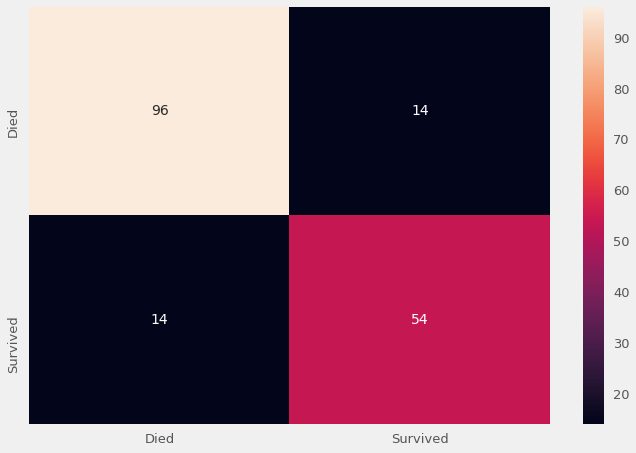

In [344]:
#model summary and confustion matrix 
cm_plot(vote)

# Proprocess the Testing data

In [348]:
df_test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


PassengerId    0.000000
Pclass         0.000000
Name           0.000000
Sex            0.000000
Age            0.205742
SibSp          0.000000
Parch          0.000000
Ticket         0.000000
Fare           0.002392
Cabin          0.782297
Embarked       0.000000
dtype: float64


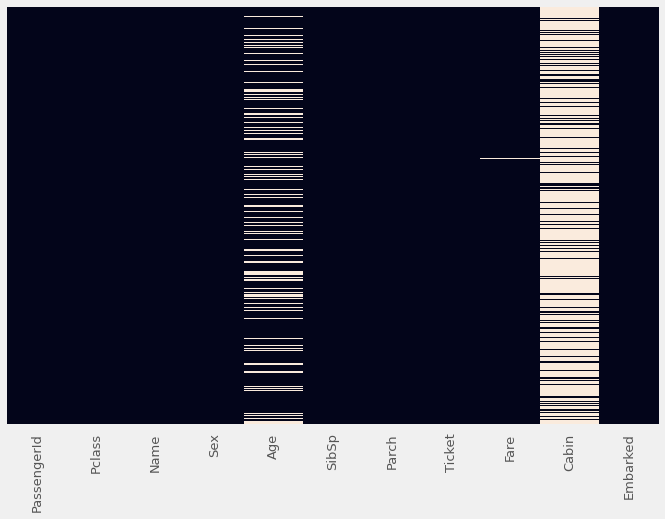

In [356]:
sns.heatmap(df_test.isna(),yticklabels=False,cbar=False);
print(df_test.isna().sum()/df_test.shape[0])

In [ ]:
Data Cleaning Steps

1. Drop Cabin column 
2. Impute Missing Age values with values obtained during the training data cleaning

In [358]:
#drop the Cabin
df_test = df_test.drop(columns = ['Cabin'],axis = 1)

In [360]:
df_test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,S
